In [17]:
from sklearn.datasets import load_diabetes
ds = load_diabetes()
ds.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [18]:
print(ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [19]:
print(ds.target_filename)
print(ds.data_filename)
print(ds.feature_names)

diabetes_target.csv.gz
diabetes_data_raw.csv.gz
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
X, y = ds.data, ds.target
X.shape, y.shape

((442, 10), (442,))

0


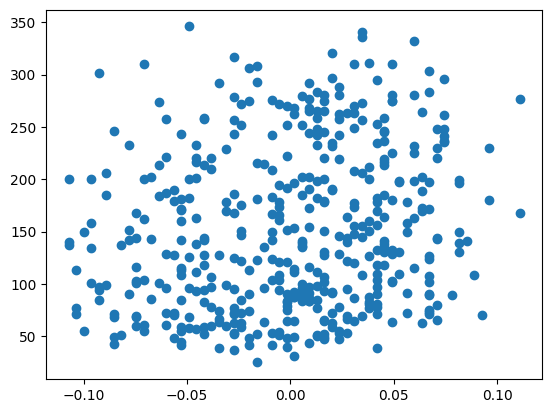

1


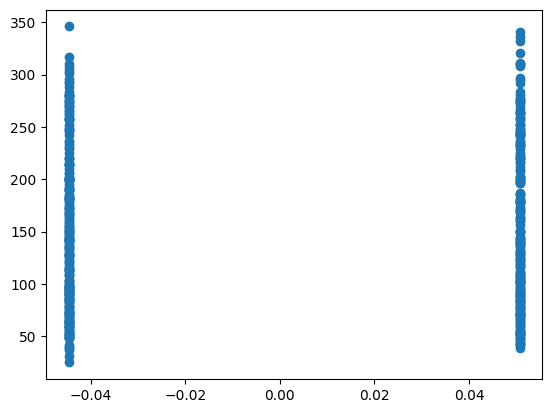

2


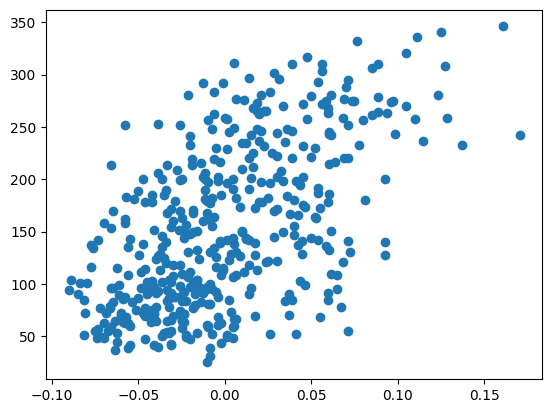

3


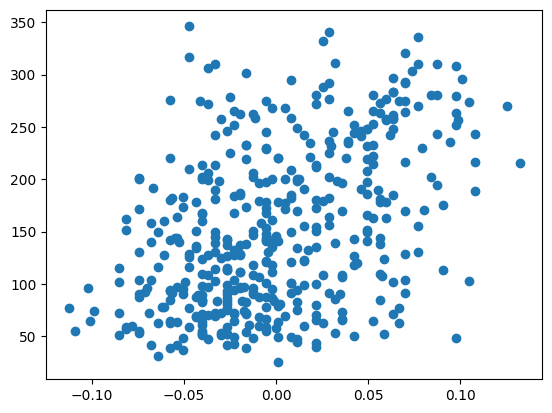

4


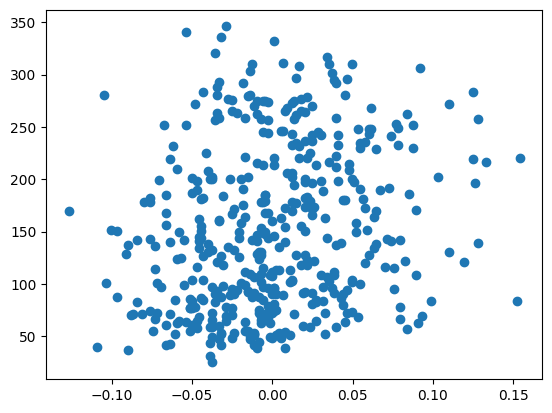

5


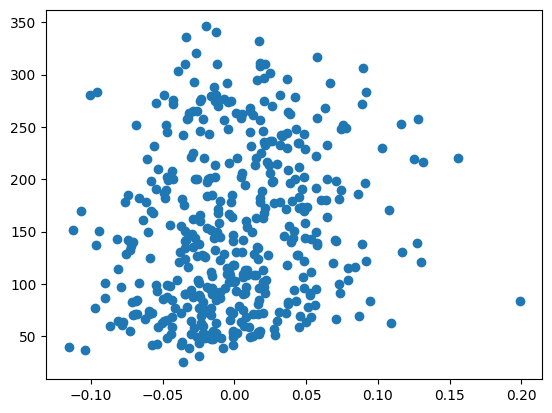

6


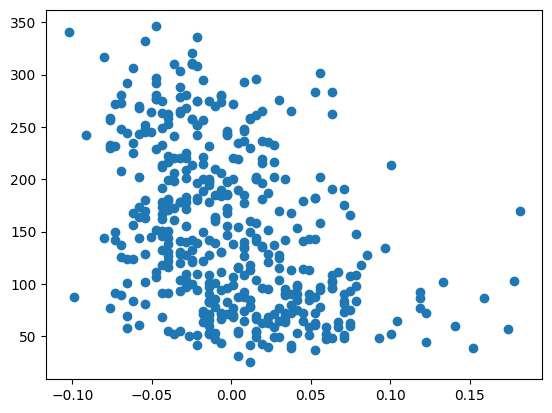

7


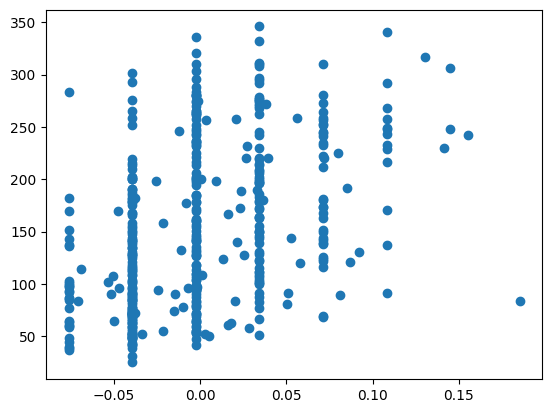

8


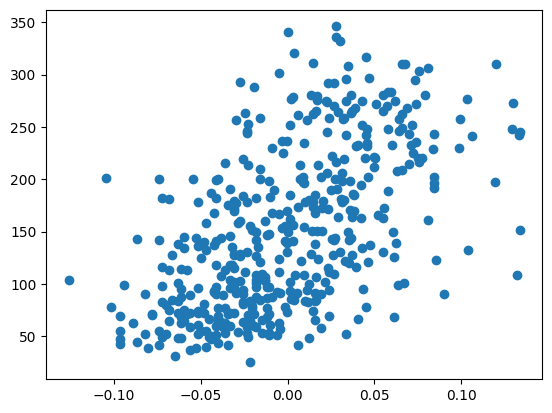

9


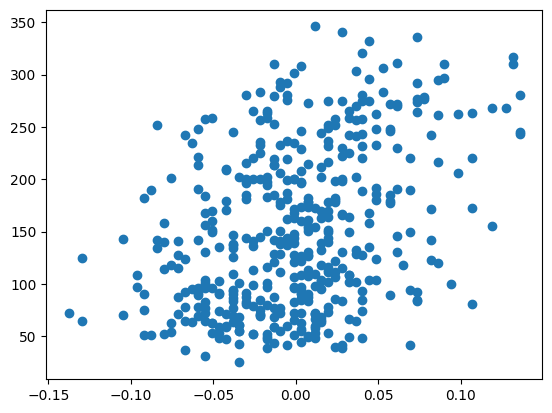

In [21]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:, i], y)
    plt.show()


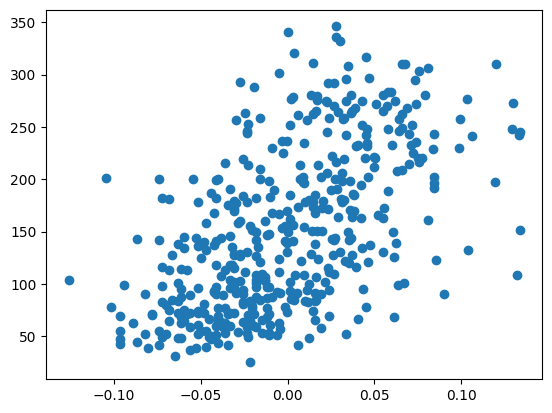

In [30]:
X8 = X[:,8:9]
plt.scatter(X8, y)
plt.show()

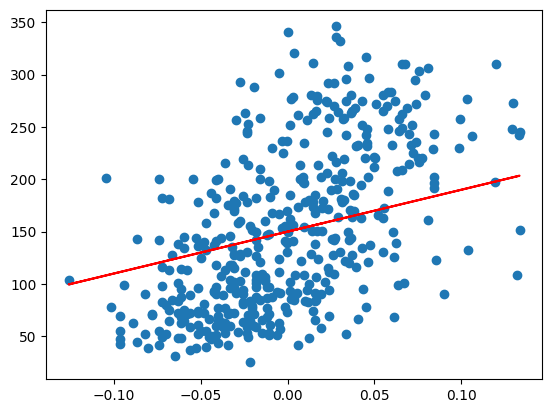

In [31]:
def modelo_linear(X, a, b):
  y = a*X + b
  return y
ypred = modelo_linear(X8, 400, 150)
plt.scatter(X8, y)
plt.plot(X8, ypred, 'r')
plt.show()

In [32]:
def mae(y, ypred):
  yDiff = ypred - y.reshape(-1, 1)
  yAbs = abs(yDiff)
  errorSum = np.sum(yAbs)
  mae = errorSum / len(yAbs)
  return mae
ypred = modelo_linear(X8, 400, 150)
mae(y, ypred)

57.438994645497814

In [33]:
def mse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = np.sum(yDiffSquare)
  mse = errorSum / len(yDiffSquare)
  return mse
ypred = modelo_linear(X8, 400, 150)
mse(y, ypred)

4638.260408052644

In [34]:
from math import sqrt
def rmse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = np.sum(yDiffSquare)
  mse = errorSum / len(yDiffSquare)
  return sqrt(mse)
ypred = modelo_linear(X8, 400, 150)
rmse(y, ypred)

68.10477522209911

In [35]:
from sklearn.metrics import mean_squared_error

def rmse(y, ypred):
  mse = mean_squared_error(y, ypred)
  return sqrt(mse)
ypred = modelo_linear(X8, 400, 150)
rmse(y, ypred)

68.10477522209911

29074.481900452487
5351.591357270078


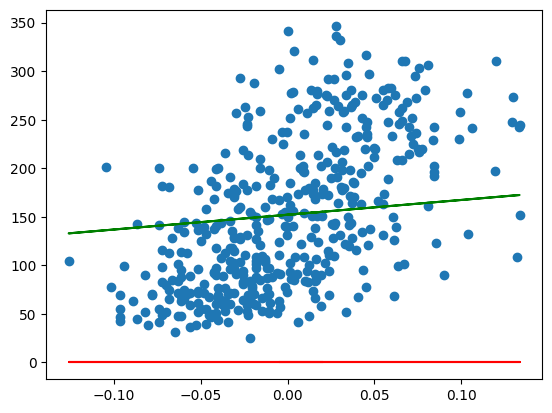

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class regressao_linear():
    def __init__(self):
        self.a = 0
        self.b = 0

    def fit(self, X, y):
        for _ in range(500):
          ypred = self.predict(X)
          erro = ypred - y.reshape(-1, 1)
          ajusteB = sum(erro) / len(erro)
          self.b = self.b - 0.1 * ajusteB[0]
          ajusteA = sum([erro[i]*X[i] for i in range(X.shape[0])]) / sum(X)
          self.a = self.b - 0.1 * ajusteB[0]
    def predict(self, X):
        y = self.a * X + self.b
        return y
plt.scatter(X8, y)
modelo = regressao_linear()
ypred = modelo.predict(X8)
print(mean_squared_error(y, ypred))
plt.plot(X8, ypred, 'r')

modelo.fit(X8, y)
ypred = modelo.predict(X8)
print(mean_squared_error(y, ypred))
plt.plot(X8, ypred, 'g')

plt.show()

29074.481900452487
74.46721259663677


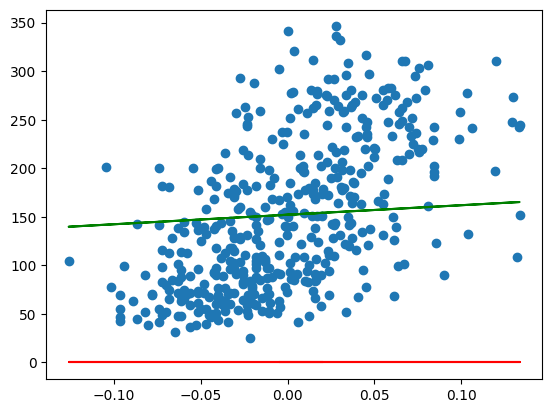

In [56]:
import numpy as np

class regressao_linear():
    def __init__(self):
      self.w = np.zeros((2,1))

    @staticmethod
    def addBias(X):
      bias = np.ones((X.shape[0], 1))
      X_b = np.concatenate((bias,X), axis=1)
      return X_b

    def fit(self, X, y):
        X_b = self.addBias(X)
        for _ in range(500):
          ypred = self.predict(X)
          erro = ypred - y.reshape(-1, 1)
          ajuste = X_b.T.dot(erro) / X_b.shape[0] # sum(X_b).reshape(-1, 1)
          self.w = self.w - 0.1 * ajuste
    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y
plt.scatter(X8, y)
modelo = regressao_linear()
ypred = modelo.predict(X8)
print(mean_squared_error(y, ypred))
plt.plot(X8, ypred, 'r')

modelo.fit(X8, y)

ypred = modelo.predict(X8)
print(rmse(y, ypred))
plt.plot(X8, ypred, 'g')

plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X8, y)
ypred = modelo.predict(X8)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

4030.998722591287
152.13348416289585 [916.13737455]
